<a href="https://colab.research.google.com/github/Sarvvesh123/aapl-stock-prediction-project/blob/main/Stock_Price_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Downloading AAPL price data

In [23]:
import yfinance as yf

In [24]:
AAPL = yf.Ticker("AAPL")

In [25]:
AAPL = AAPL.history(period="max")

# Cleaning and visualizing AAPL stock

Text(0.5, 1.0, 'AAPL Closing Price')

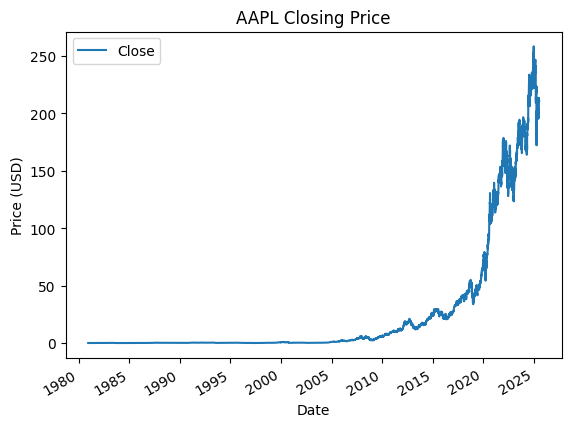

In [26]:
from matplotlib import pyplot as plt
AAPL.plot.line(y="Close", use_index=True)
plt.xlabel("Date")       # X-axis label
plt.ylabel("Price (USD)")  # Y-axis label
plt.title("AAPL Closing Price")  # Chart title

In [27]:
del AAPL["Dividends"]
del AAPL["Stock Splits"]

# Set up target and train machine learning model

In [28]:
AAPL["Tomorrow"] = AAPL["Close"].shift(-1)

In [29]:
AAPL["Target"] = (AAPL["Tomorrow"] > AAPL["Close"]).astype(int)

In [30]:
AAPL = AAPL.loc["1990-01-01":"2025-03-01"].copy()

In [31]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(n_estimators=100, min_samples_split=100, random_state=1)
train = AAPL.iloc[:-100]
test = AAPL.iloc[-100:]
predictors = ["Close", "Volume", "Open", "High", "Low"]
model.fit(train[predictors], train["Target"])

RandomForestClassifier(min_samples_split=100, random_state=1)

In [32]:
from sklearn.metrics import precision_score
preds = model.predict(test[predictors])


In [33]:
import pandas as pd
preds = pd.Series(preds, index=test.index)

In [34]:
precision_score(test["Target"], preds)

0.6153846153846154

<Axes: xlabel='Date'>

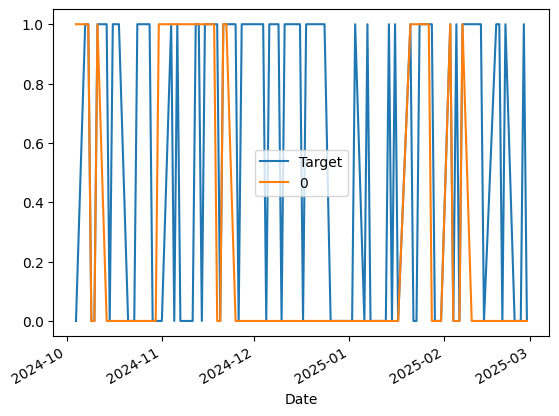

In [35]:
combined = pd.concat([test["Target"], preds], axis=1)
combined.plot()

# Backtesting

In [36]:
def predict (train, test, predictors, model):
    model.fit(train[predictors], train["Target"])
    preds = model.predict(test[predictors])
    preds = pd.Series(preds, index=test.index, name="Predictions")
    combined = pd.concat([test["Target"], preds], axis=1)
    return combined

In [37]:
def backtest (data, model, predictors, start=2500, step=250):
    all_predictions = []
    for i in range(start, data.shape[0], step):
        train = data.iloc[0:i].copy()
        test = data.iloc[i:(i+step)].copy()
        predictions = predict(train, test, predictors, model)
        all_predictions.append(predictions)
    return pd.concat(all_predictions)

In [38]:
predictions = backtest(AAPL, model, predictors)

In [39]:
precision_score(predictions["Target"], predictions["Predictions"])

0.5181682429069189